# This notebook is for testing the creation of a rainbow action which will do the following:
- Taking starspot parameters (coverage fractions and temperatures) as arguments,
- calculate the wavelength dependent contribution to the measured depth of spectral features detected during transmission spectroscopy of an exoplanet atmosphere
- plot that model "starspot contribution" spectrum ($\Delta$D$_{spot}$($\lambda$))
- Calculate this for WASP-43b
## Other outputs include
- the stellar rotational modulation semi-amplitudes (calculated for a given spot coverage and contrast)
- the total integrated stellar flux (check that Teff^4 = Tspot^4 + Tunspot^4)

In [9]:
from chromatic import *
from rainbowconnection.sources.phoenix import *

# create an example object to test on 
tester = SimulatedRainbow()

# define your new method - calculate delta D_spot (lambda)
def starspot_contribution(self,
                          T_spot = 4000 *u.K,
                          T_unspot = 3500*u.K,
                          f_spot = 0.1,
                          f_tra = 0.,
                          r_sun = 0.5 * u.Rsun,
                          m_sun = 0.5 * u.Msun,
                          transit_depth = 0.06):
    """
    Calculate delta D(lambda), the contribution of 
    starspot features to the wavelength dependent transit depth

    Parameters
    ----------
    T1
        the photosphere temperature, in K
    T2
        the spot temperature, in K
    f_spot
        the global spot coverage fraction
    f_tra
        the transit chord spot coverage fraction
    r_sun
        the stellar radius, in solar radii
    m_sun
        the stellar mass, in solar masses
    """
    
    new = self._create_copy()
    
    S_spot = Star(teff=T_spot, radius=r_sun,mass=m_sun,R=1e5)
    S_unspot = Star(teff=T_unspot, radius=r_sun,mass=m_sun,R=1e5)
    
    s_spot = S_spot.spectrum(new.wavelength)/np.nanmedian(S_spot.spectrum(new.wavelength))
    s_unspot = S_unspot.spectrum(new.wavelength)/np.nanmedian(S_unspot.spectrum(new.wavelength))
    
    flux_ratio = s_spot/s_unspot
    
    top = (1. - f_tra) + f_tra * flux_ratio
    
    bottom = (1. - f_spot) + f_spot * flux_ratio
    
    delta_D_lam = (top / bottom) - 1
    
    depth = transit_depth * delta_D_lam
    
    return new, depth

tester, result = starspot_contribution(tester)

print(tester)
print(result)

<Simulated🌈(231w, 150t)>
[ -4.20440795e-03  -3.42120131e-03  -2.23248412e-03  -1.87505821e-03
  -3.21518853e-03  -2.93555898e-03  -2.59039409e-03  -2.44958987e-03
  -1.98613463e-03  -3.62455889e-03  -3.56548617e-03  -2.98359408e-03
  -4.27155964e-03  -3.59100817e-03  -2.99526938e-03  -2.77319894e-03
  -3.93428159e-03  -5.31644380e-03  -4.28802628e-03  -2.83836326e-03
  -1.96608111e-03  -3.10903158e-03  -4.99092986e-03  -3.74399292e-03
  -3.05877865e-03  -2.56938370e-03  -1.89348637e-03  -1.63013679e-03
  -1.82226155e-03  -3.02309221e-03  -3.89995650e-03  -3.47544604e-03
  -2.77980710e-03  -1.61606263e-03  -7.19112562e-04  -2.00772114e-03
  -2.67481225e-03  -1.48049116e-03  -2.80117388e-04   3.91767496e-04
   5.94087753e-04   6.99804224e-04   3.50591428e-04  -3.26528924e-04
  -2.91235638e-04  -2.75996236e-05   3.53139262e-04   6.40326187e-04
   8.88149246e-04   9.92016246e-04   9.54980965e-04   9.13882614e-04
   8.47247344e-04   4.65025135e-04   7.75281969e-04   1.02322798e-03
   1.1402

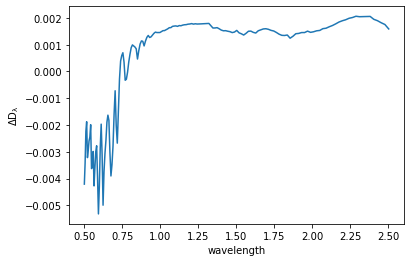

In [10]:
plt.plot(tester.wavelength, result)
plt.xlabel('wavelength')
plt.ylabel(r'$\Delta\rm{D}_{\lambda}$')
plt.show()